In this Jupyter Notebook, we use the NBA API to get the stats of specific teams we are interested in. We then use the stats to create dataframes and visualizations for each team. Finally, we combine all the dataframes into one json-encoded file for export to our database. The teams we analyzed were: Cleveland Cavaliers, Los Angeles Lakers, Boston Celtics, Chicago Bulls, Golden State Warriors, New York Knicks, and San Antonio Spurs.

In [53]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import teamyearbyyearstats
import numpy as np
import json

In [54]:
# Parse all team stats data from the NBA API and store it in a dictionary of dataframes
team_ids = [1610612739, 1610612747, 1610612738, 1610612741, 1610612744, 1610612752, 1610612759]
team_dataframes = {}

for id in team_ids:
    
    # Retrieve team year-by-year statistics
    team_stats = teamyearbyyearstats.TeamYearByYearStats(team_id=id)
    
    # Get the data frame containing the team statistics
    team_stats_df = team_stats.get_data_frames()[0]
    
    # Filter the relevant columns for three-point attempts made (FG3A), made (FG3M), and percentage (FG3_PCT)
    team_three_point_attempts_made = team_stats_df['FG3A']
    team_three_point_made = team_stats_df['FG3M']
    team_three_point_percentage = team_stats_df['FG3_PCT']
    
    # Combine the relevant columns into a new dataframe
    team_three_point_stats_df = pd.DataFrame({
    'Year': team_stats_df['YEAR'],
    'Three-Point Attempts': team_three_point_attempts_made,
    'Three-Points Made': team_three_point_made,
    'Three-Point Percentage': team_three_point_percentage
    })
    
    # Convert the 'Year' column to integers representing the starting year of the season
    team_three_point_stats_df['Year'] = team_three_point_stats_df['Year'].str[:4].astype(int)  
    
    # Filter the dataframe to show years after 1979
    team_three_point_stats_df = team_three_point_stats_df[team_three_point_stats_df['Year'] >= 1979]

    # Calculate regular season win percentage (WINS / (WINS + LOSSES)) and add it to the dataframe
    team_three_point_stats_df['Win Percentage'] = team_stats_df['WINS'] / (team_stats_df['WINS'] + team_stats_df['LOSSES'])
    
    # Add dataframe to dictionary
    team_dataframes[team_stats_df['TEAM_NAME'][0]] = team_three_point_stats_df

In [56]:
# Function for team visualizations

def visualize_team_stats(team_name):
    try:
        df = team_dataframes[team_name]
        
    except KeyError:
        print('Team not found.')
        return
        
    # Create a scatterplot of years and win percentages
    # Extract the data for the plot

    years = df['Year']
    win_percentage = df['Win Percentage']

    # Create the scatter plot
    plt.figure(figsize=(20, 6))
    plt.scatter(years, win_percentage, s=100, c='blue', alpha=0.8)
    plt.xlabel('Year')
    plt.ylabel('Win Percentage')
    plt.title(f'Win Percentages Over the Years for the {team_name}')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.xticks(np.arange(min(years), max(years)+1, 1.0))
    
    # Display the plot
    plt.show()

    # Create a scatterplot of years and 3-point percentages
    # Extract the data for the plot
    three_point_percentage = df['Three-Point Percentage']

    # Create the dot plot
    plt.figure(figsize=(20, 6))
    plt.scatter(years, three_point_percentage, s=100, c='blue', alpha=0.8)
    plt.xlabel('Year')
    plt.ylabel('Three-Point Percentage')
    plt.title(f'Three-Point Percentages Over the Years for the {team_name}')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.xticks(np.arange(min(years), max(years)+1, 1.0))

    # Display the plot
    plt.show()

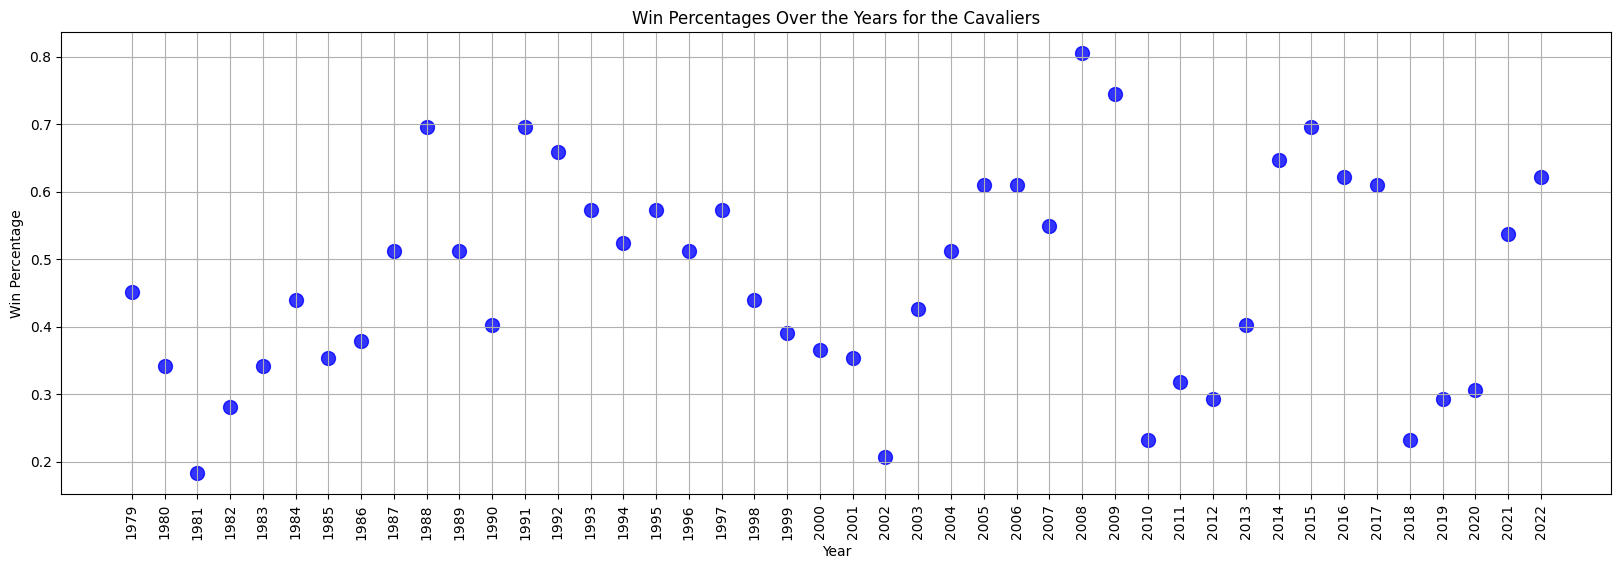

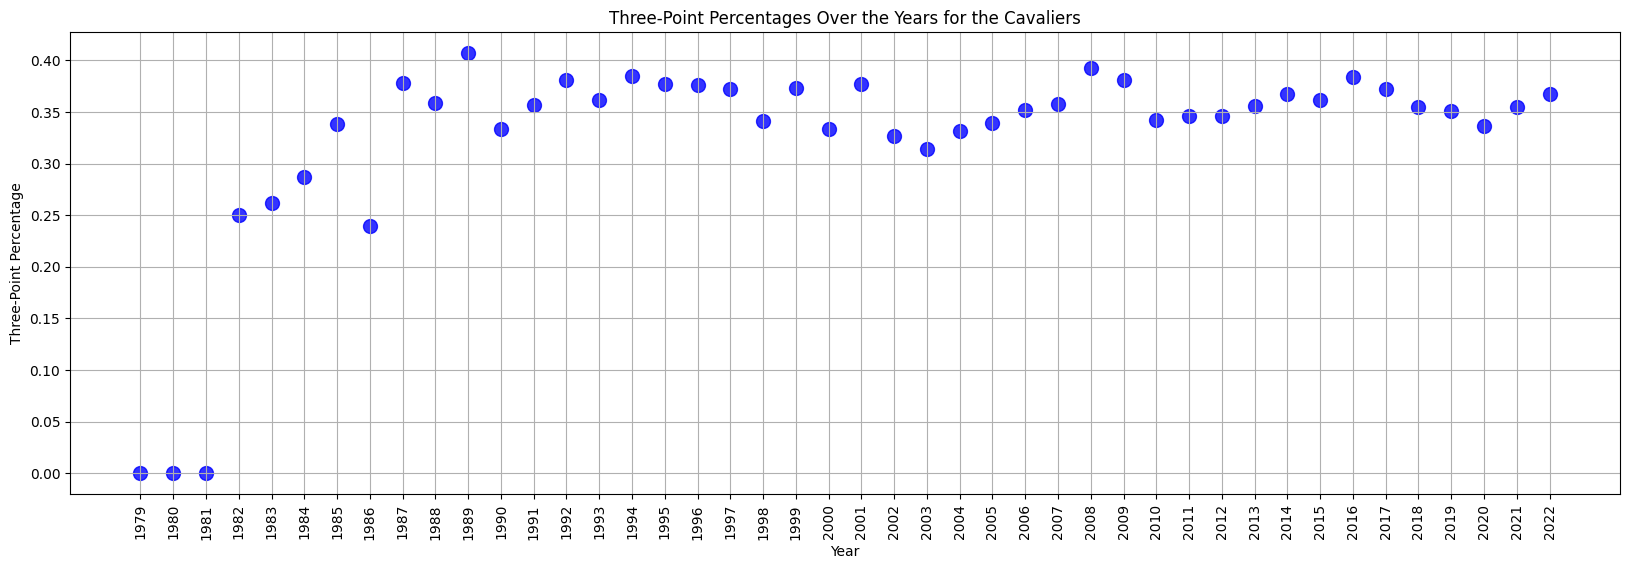

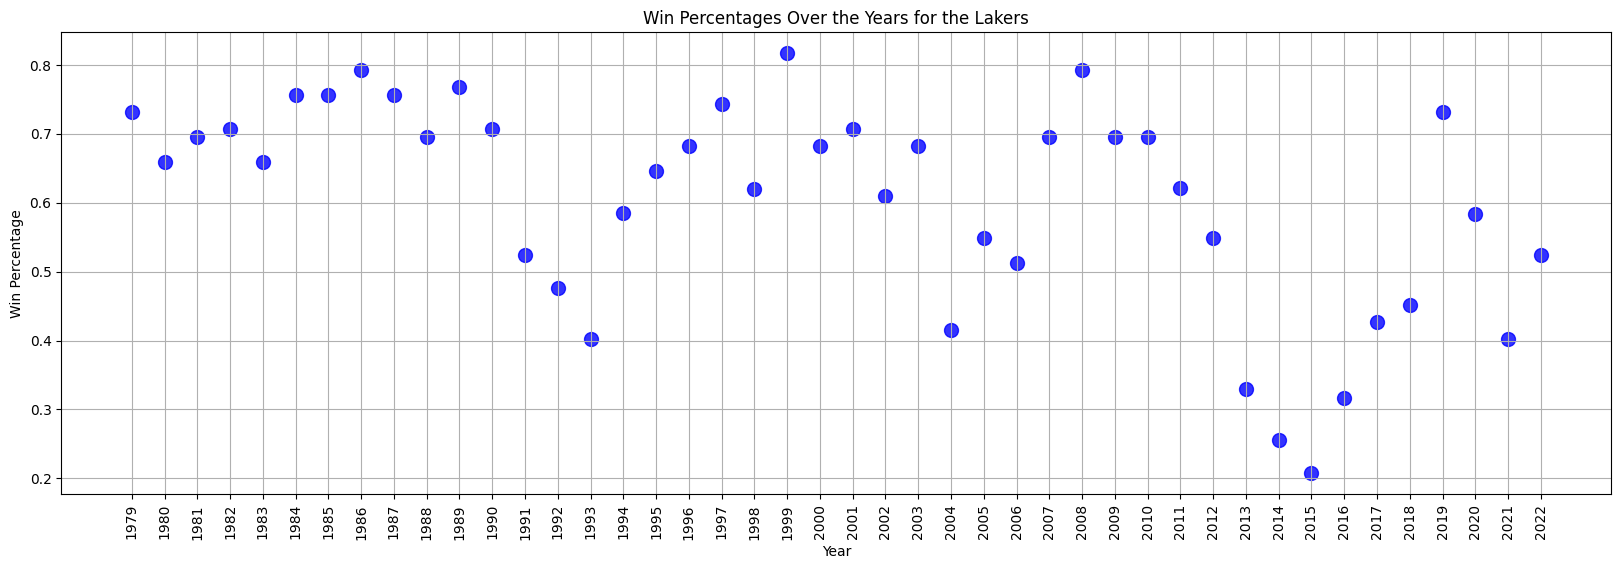

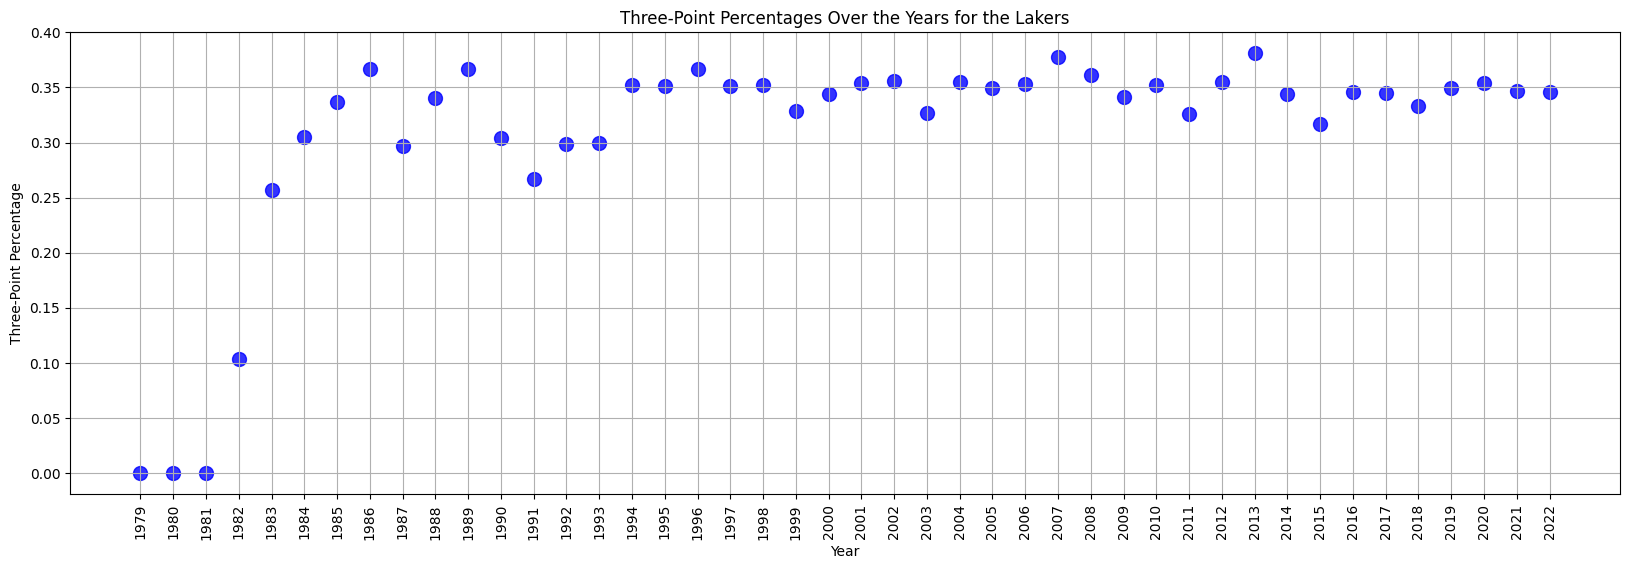

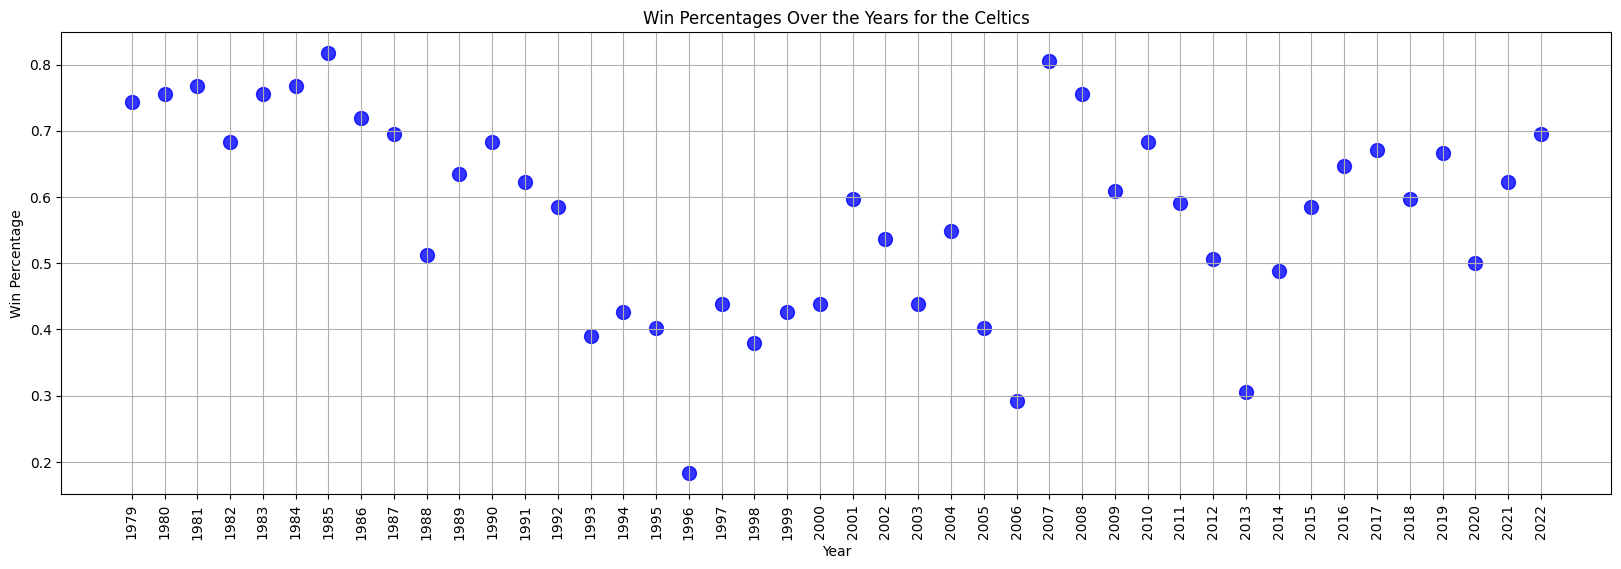

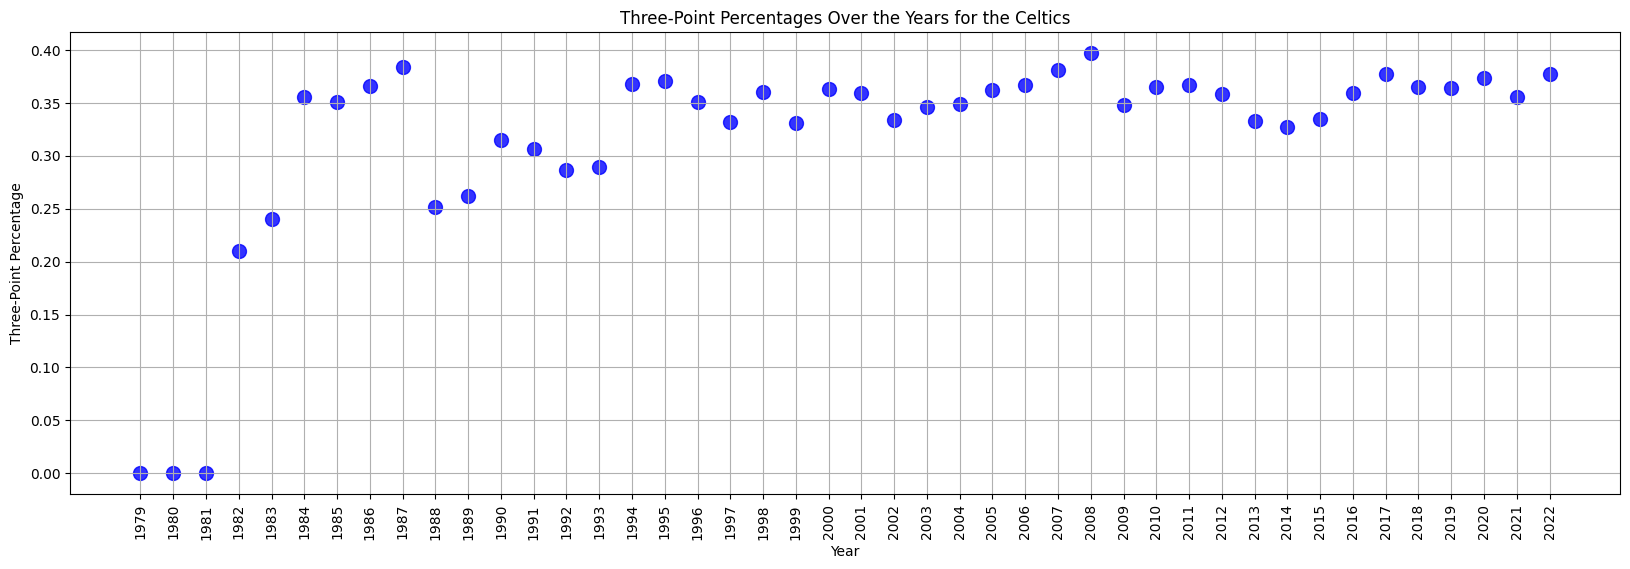

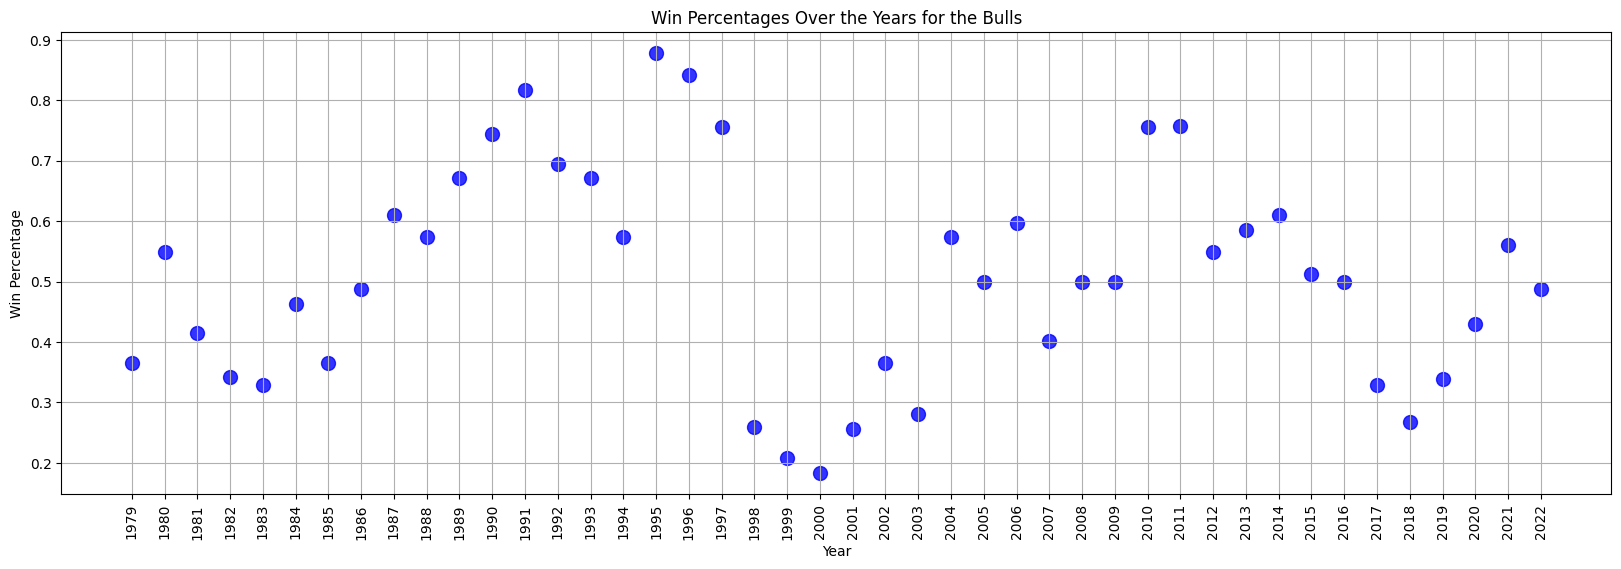

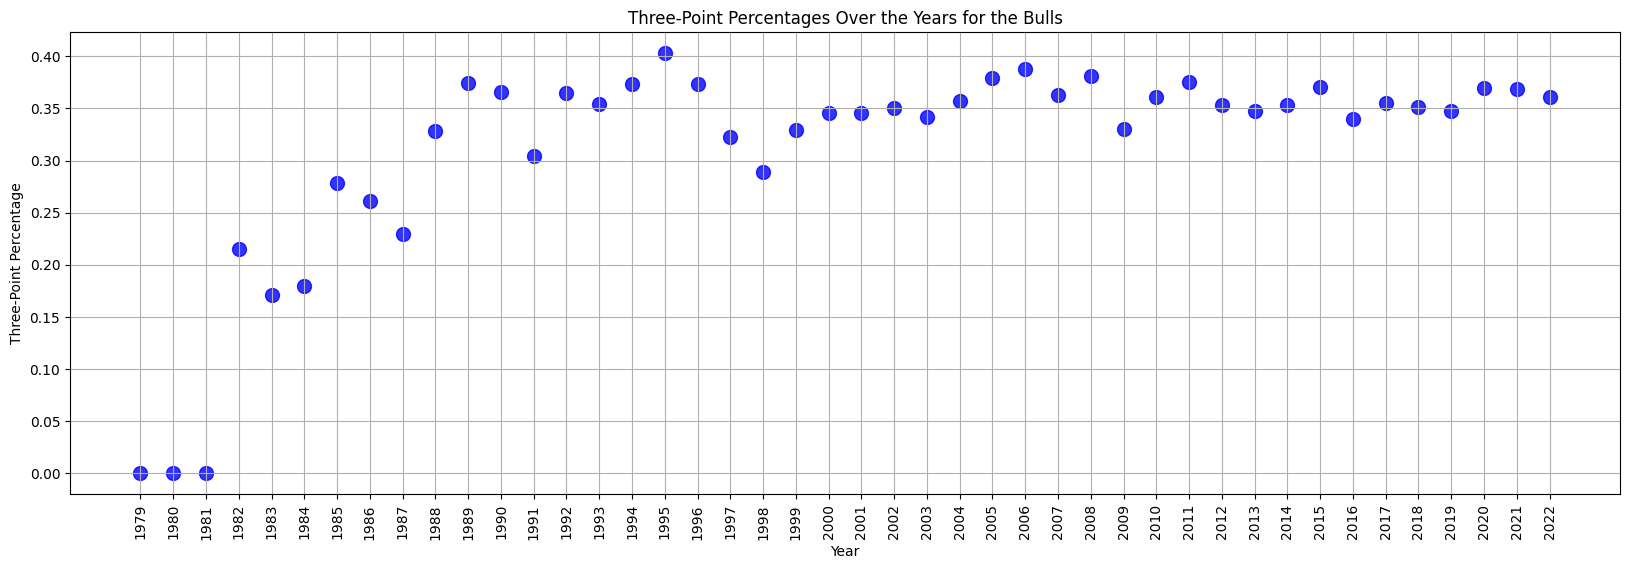

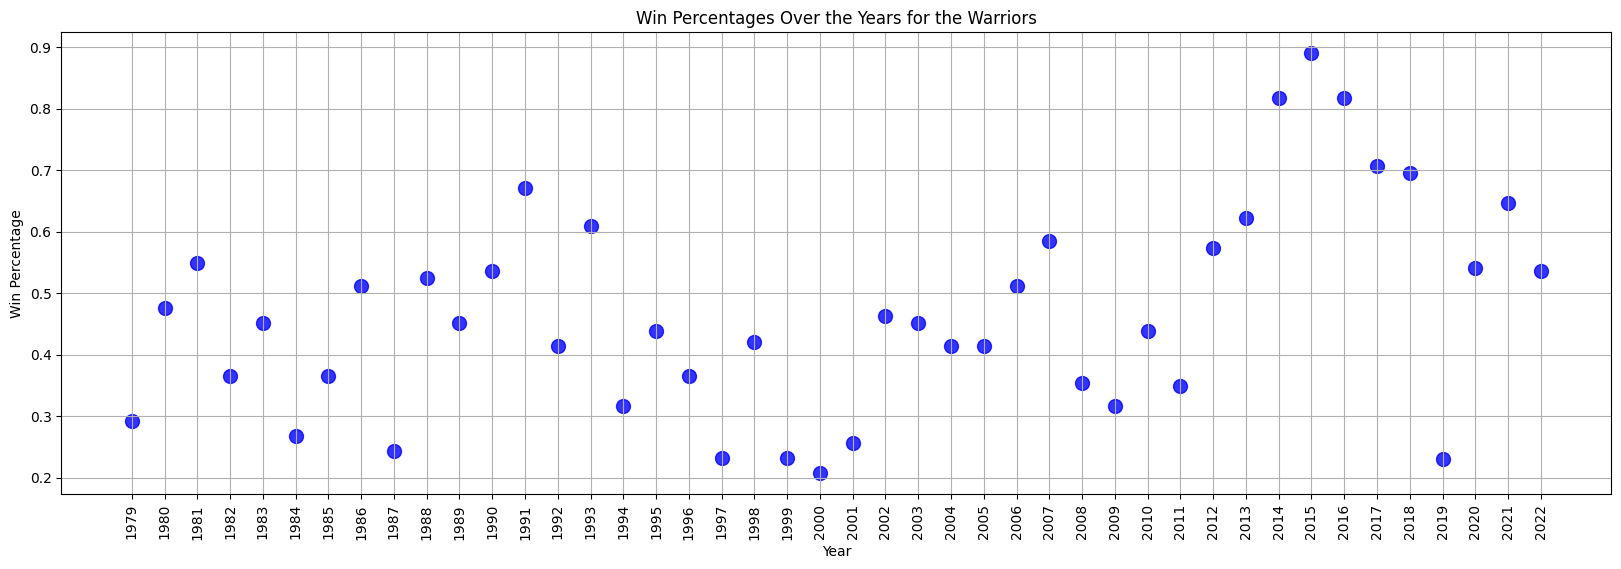

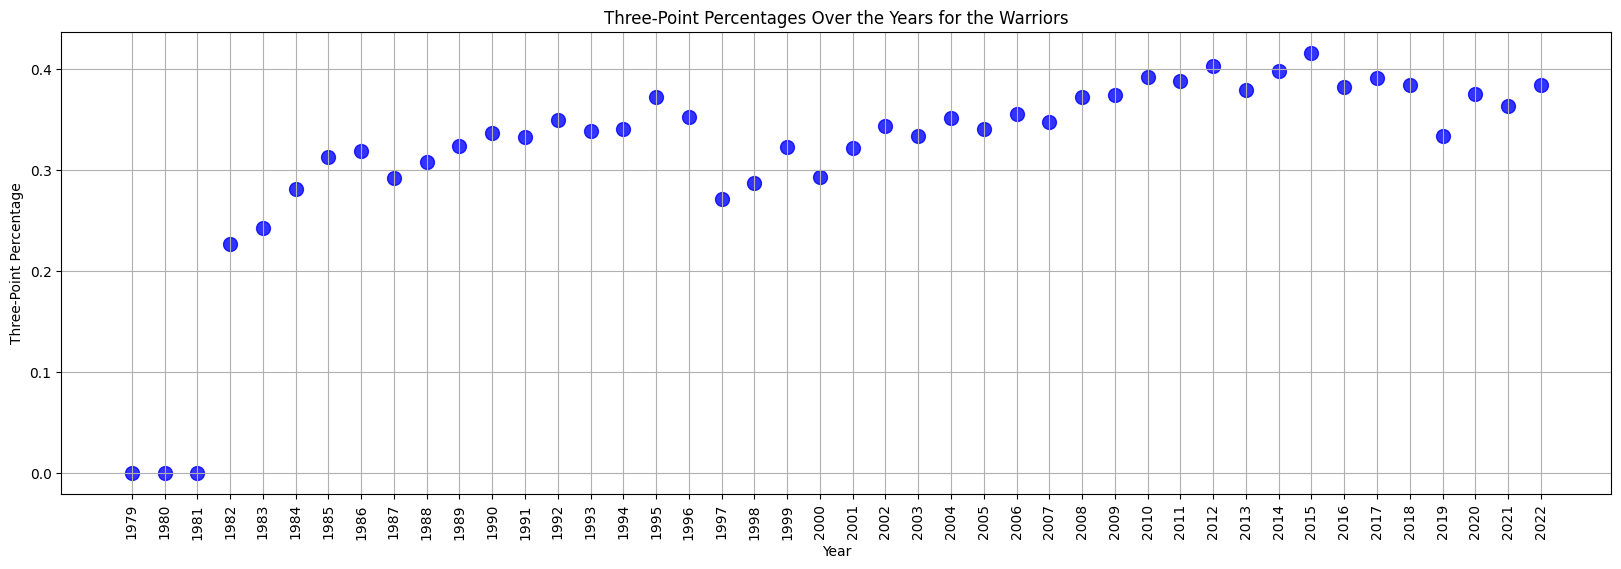

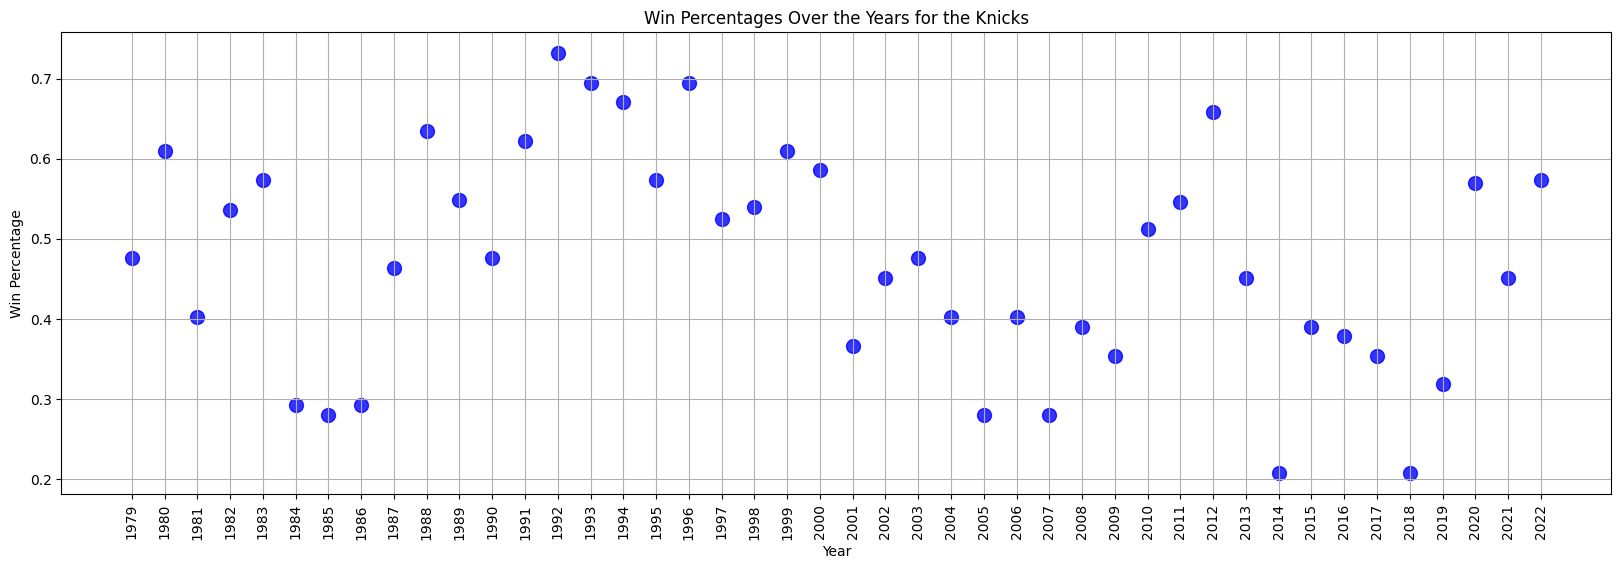

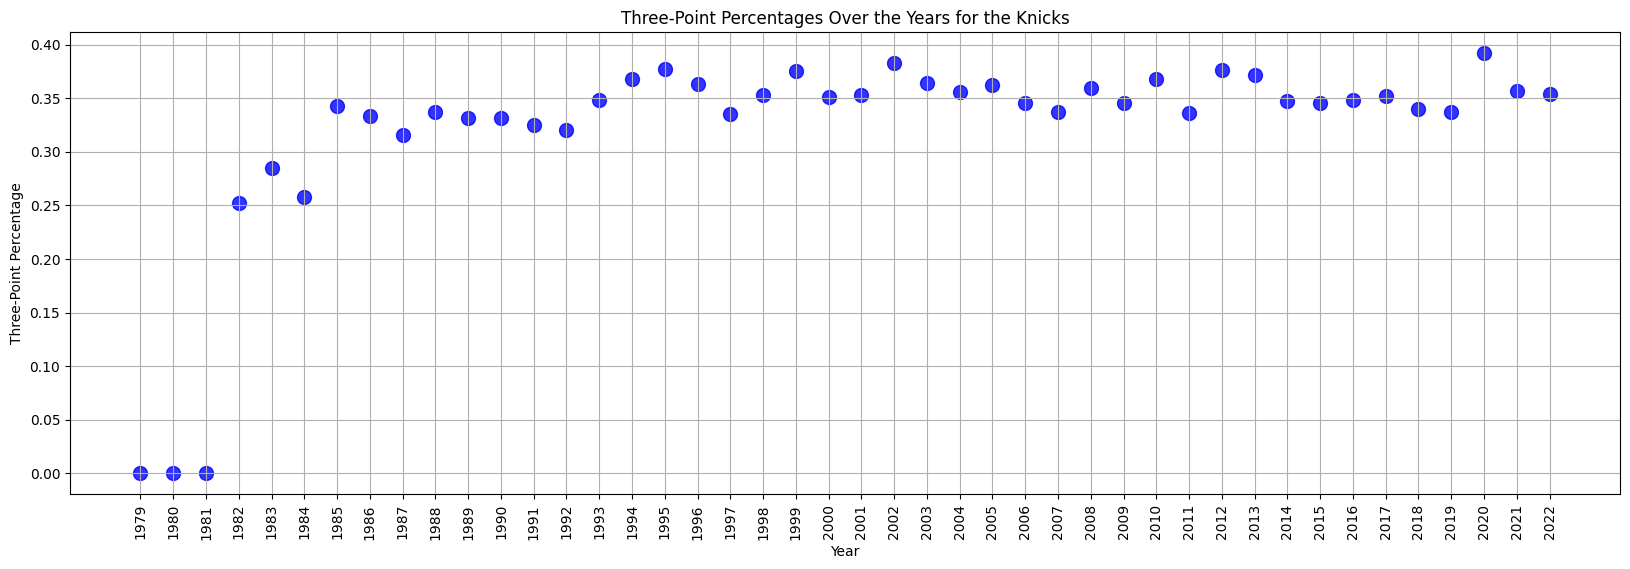

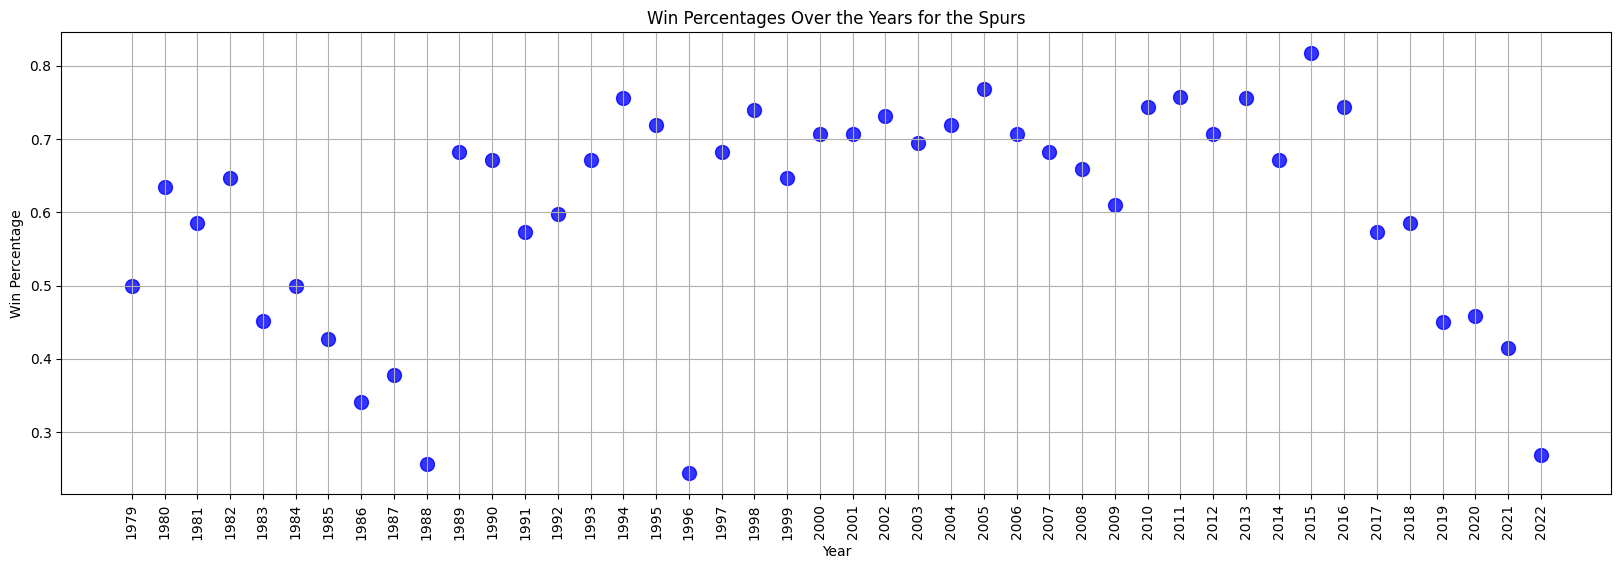

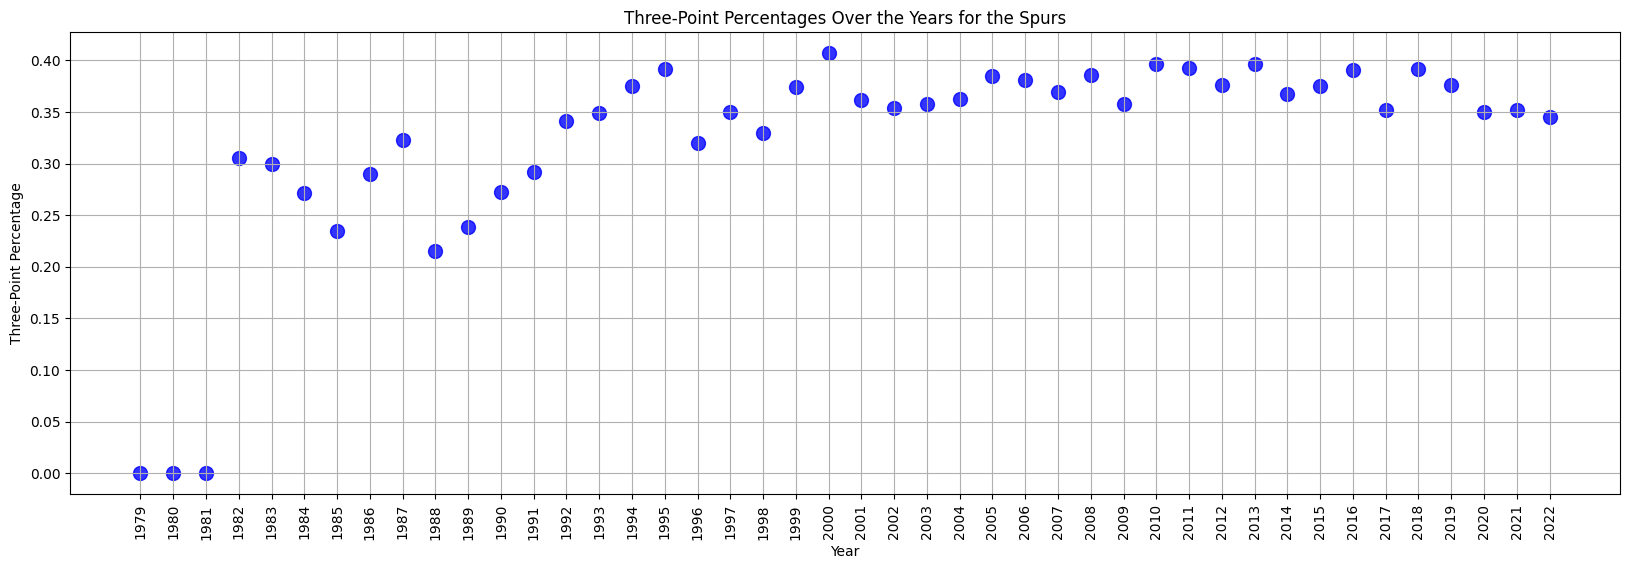

In [57]:
# Visualize each team's stats
for key in team_dataframes.keys():
    visualize_team_stats(key)

In [58]:
# Export the dictionary to JSON format to be world-readable
# Convert all dataframes to JSON

for key in team_dataframes.keys():
    team_dataframes[key] = team_dataframes[key].to_json(orient='records', lines=True)

with open('export/nfl_team_dataframes.json', 'w') as json_file:
    json.dump(team_dataframes, json_file)